# Decision Tree Algorithm for Data Science
## Laboratory Activity - Complete Implementation

---

## Learning Objectives

By completing this laboratory activity, you will:
1. Understand the fundamental concepts of Decision Tree algorithm
2. Apply Decision Tree classifier to real-world datasets
3. Analyze and interpret the structure of a trained decision tree
4. Evaluate model performance using appropriate metrics
5. Visualize decision tree structures for better interpretability
6. Identify limitations and apply techniques to improve model generalization

---

# Part 1: Import Required Libraries

First, we need to import all the necessary libraries for our decision tree implementation.

In [9]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Part 2: Load or Create Dataset

We'll create a simple dataset to demonstrate the Decision Tree algorithm.

In [10]:
df = pd.read_csv('student_habits_performance.csv')


print("Dataset loaded successfully!")
print("=" * 70)
print(f"Dataset shape: {df.shape}")
print(f"Number of students: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\n")

# Display first few rows
print("First 10 rows of the dataset:")
print(df.head(10))
print("\n")



Dataset loaded successfully!
Dataset shape: (1000, 16)
Number of students: 1000
Number of columns: 16


First 10 rows of the dataset:
  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   
5      S1005   24    Male                  7.2                 1.3   
6      S1006   21  Female                  5.6                 1.5   
7      S1007   21  Female                  4.3                 1.0   
8      S1008   23  Female                  4.4                 2.2   
9      S1009   18  Female                  4.8                 3.1   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1         

In [11]:
# Display dataset information
print("Dataset Information:")
print("=" * 70)
print(df.info())
print("\n")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality            

In [12]:
# Display column names
print("Column Names:")
print("=" * 70)
print(df.columns.tolist())
print("\n")

# Check for missing values
print("Missing Values Check:")
print("=" * 70)
print(df.isnull().sum())
print("\n")

Column Names:
['student_id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'exam_score']


Missing Values Check:
student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64




In [13]:
# Basic statistics
print("Dataset Statistics:")
print("=" * 70)
print(df.describe())
print("\n")

Dataset Statistics:
             age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.

# Part 3: Data Preprocessing

Clean and prepare the data for machine learning.

In [14]:
print("DATA PREPROCESSING")
print("=" * 70)

# Create a copy for processing
df_processed = df.copy()

# Step 1: Handle missing values
print("Step 1: Handling Missing Values")
print("-" * 50)

# Fill numeric columns with median
numeric_columns = df_processed.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col].fillna(df_processed[col].median(), inplace=True)
        print(f"Filled {df_processed[col].isnull().sum()} missing values in {col} with median")

# Fill categorical columns with mode (most frequent value)
categorical_columns = df_processed.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
        print(f"Filled missing values in {col} with mode")

print("\n")

# Step 2: Remove student_id (not a predictive feature)
print("Step 2: Removing Non-Predictive Columns")
print("-" * 50)
if 'student_id' in df_processed.columns:
    df_processed = df_processed.drop('student_id', axis=1)
    print("Removed 'student_id' column")
print("\n")

# Step 3: Identify categorical columns
print("Step 3: Identifying Variable Types")
print("-" * 50)
categorical_features = ['gender', 'part_time_job', 'diet_quality', 'exercise_frequency',
                        'parental_education_level', 'internet_quality', 
                        'extracurricular_participation']

numeric_features = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
                   'attendance_percentage', 'sleep_hours', 'mental_health_rating']

print(f"Categorical features: {categorical_features}")
print(f"Numeric features: {numeric_features}")
print("\n")

# Step 4: Encode categorical variables
print("Step 4: Encoding Categorical Variables")
print("-" * 50)
label_encoders = {}

for col in categorical_features:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
        label_encoders[col] = le
        print(f"Encoded '{col}': {dict(enumerate(le.classes_))}")

print("\n")

# Step 5: Create target variable (Pass/Fail classification)
print("Step 5: Creating Target Variable")
print("-" * 50)
passing_score = 60  # Adjust to preference

df_processed['pass_fail'] = df_processed['exam_score'].apply(
    lambda x: 'Pass' if x >= passing_score else 'Fail'
)

print(f"Created target variable 'pass_fail' (Passing score: {passing_score})")
print(f"\nClass distribution:")
print(df_processed['pass_fail'].value_counts())
print(f"\nPercentage distribution:")
print(df_processed['pass_fail'].value_counts(normalize=True) * 100)
print("\n")

DATA PREPROCESSING
Step 1: Handling Missing Values
--------------------------------------------------
Filled missing values in parental_education_level with mode


Step 2: Removing Non-Predictive Columns
--------------------------------------------------
Removed 'student_id' column


Step 3: Identifying Variable Types
--------------------------------------------------
Categorical features: ['gender', 'part_time_job', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
Numeric features: ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'mental_health_rating']


Step 4: Encoding Categorical Variables
--------------------------------------------------
Encoded 'gender': {0: 'Female', 1: 'Male', 2: 'Other'}
Encoded 'part_time_job': {0: 'No', 1: 'Yes'}
Encoded 'diet_quality': {0: 'Fair', 1: 'Good', 2: 'Poor'}
Encoded 'exercise_frequency': {0: np.int64(0), 1: np.int64

# Part 4: Exploratory Data Analysis (EDA)

Visualize and understand the dataset before building the model.

EXPLORATORY DATA ANALYSIS


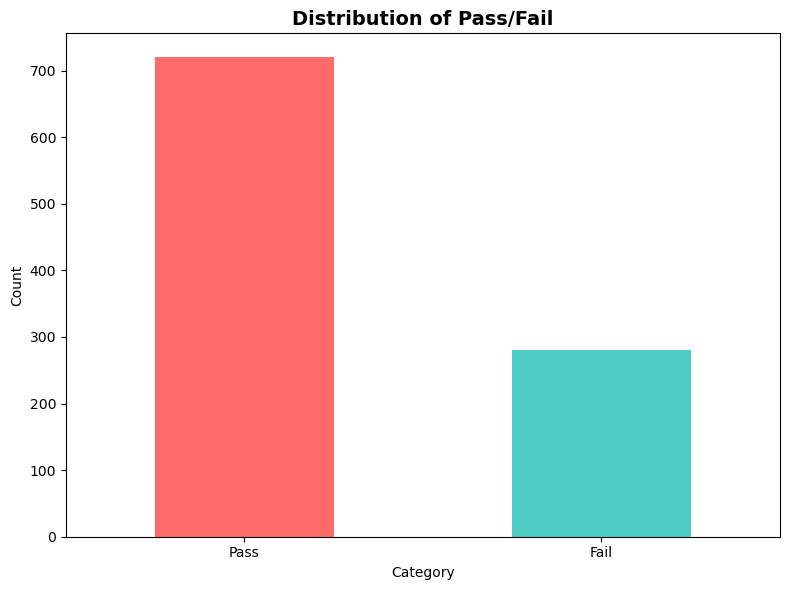

Target distribution plot saved as 'target_distribution.png'



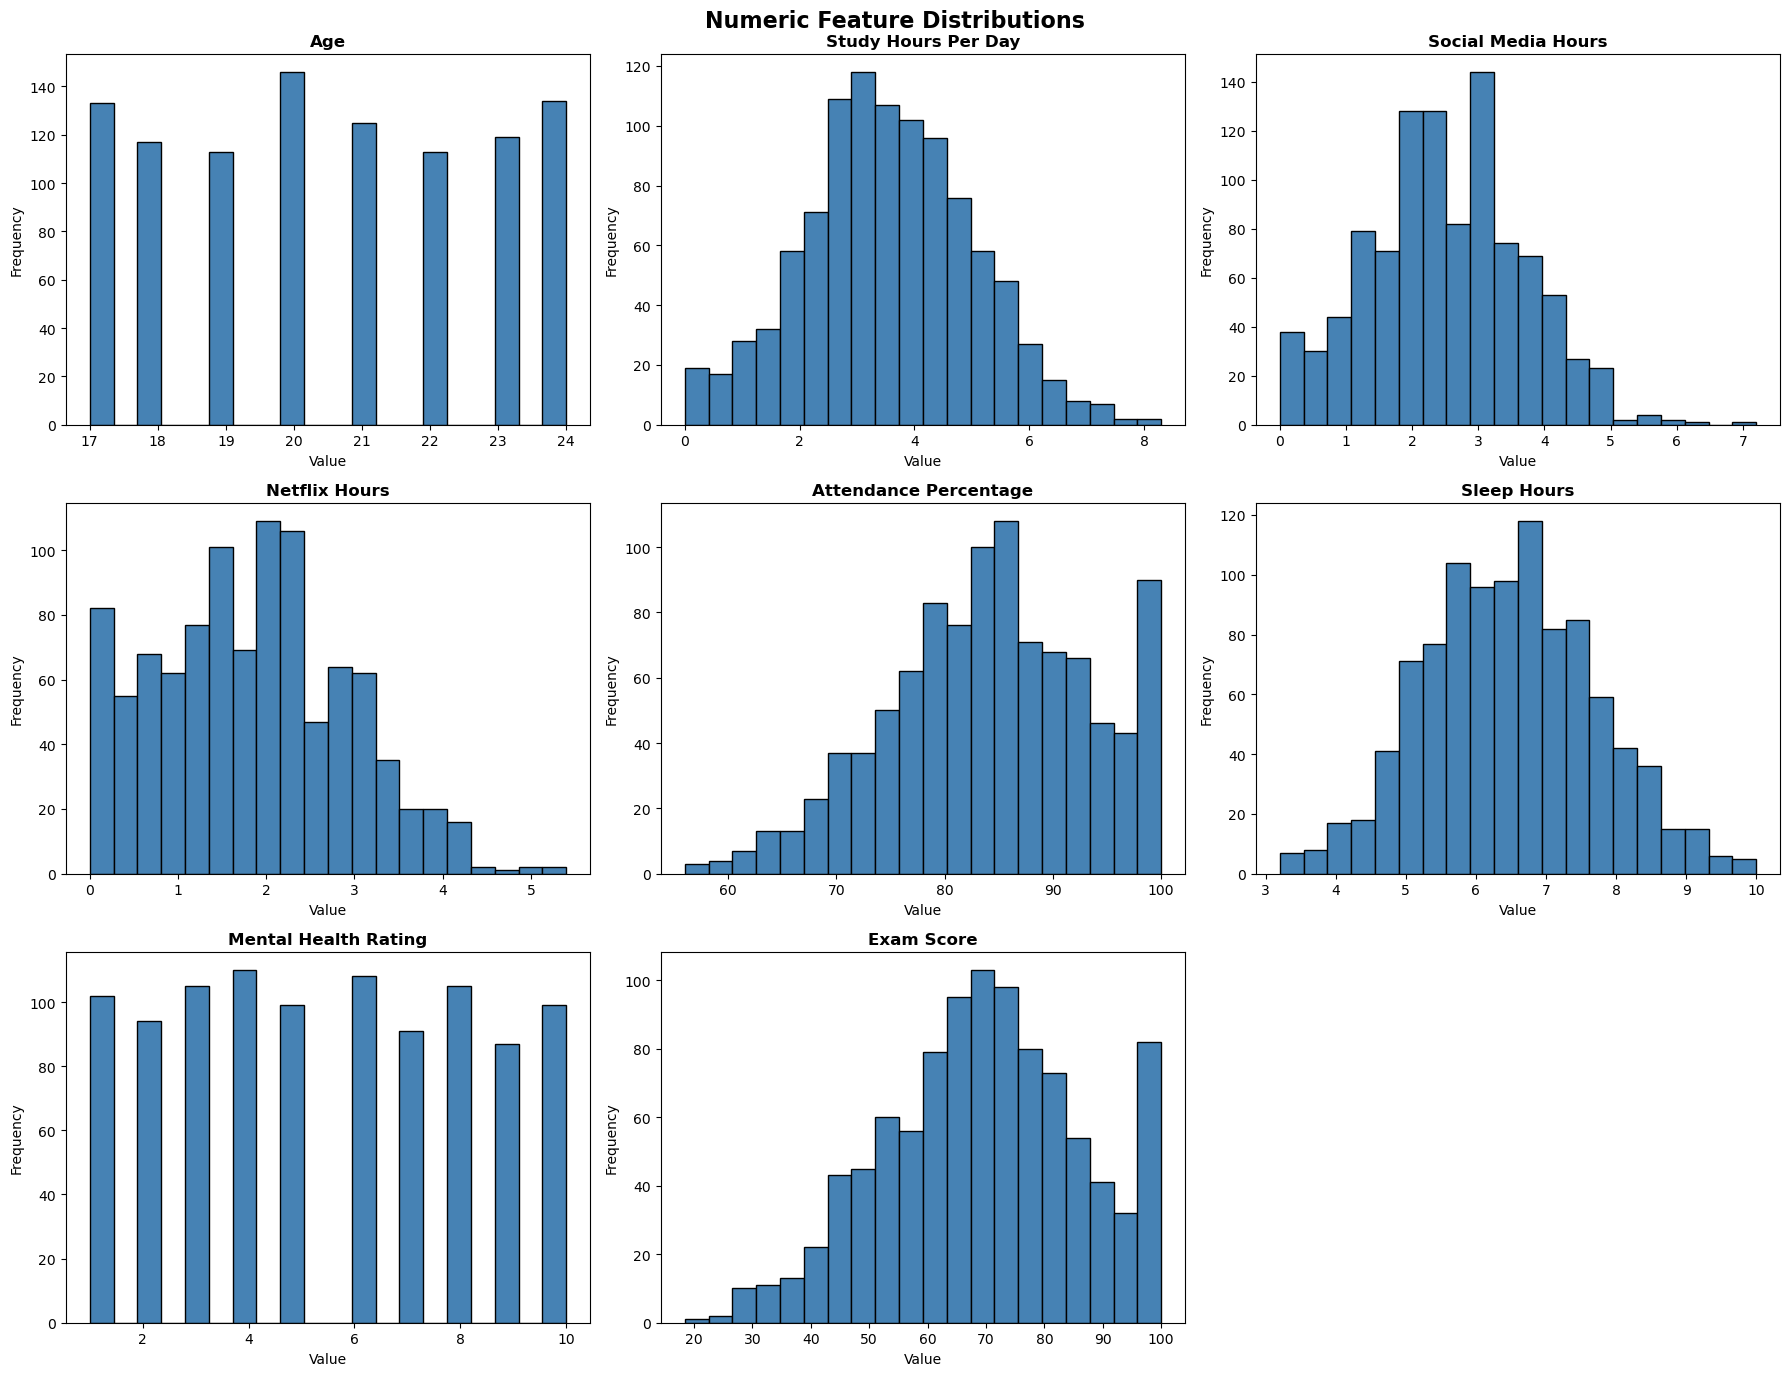

Feature distributions saved as 'feature_distributions.png'



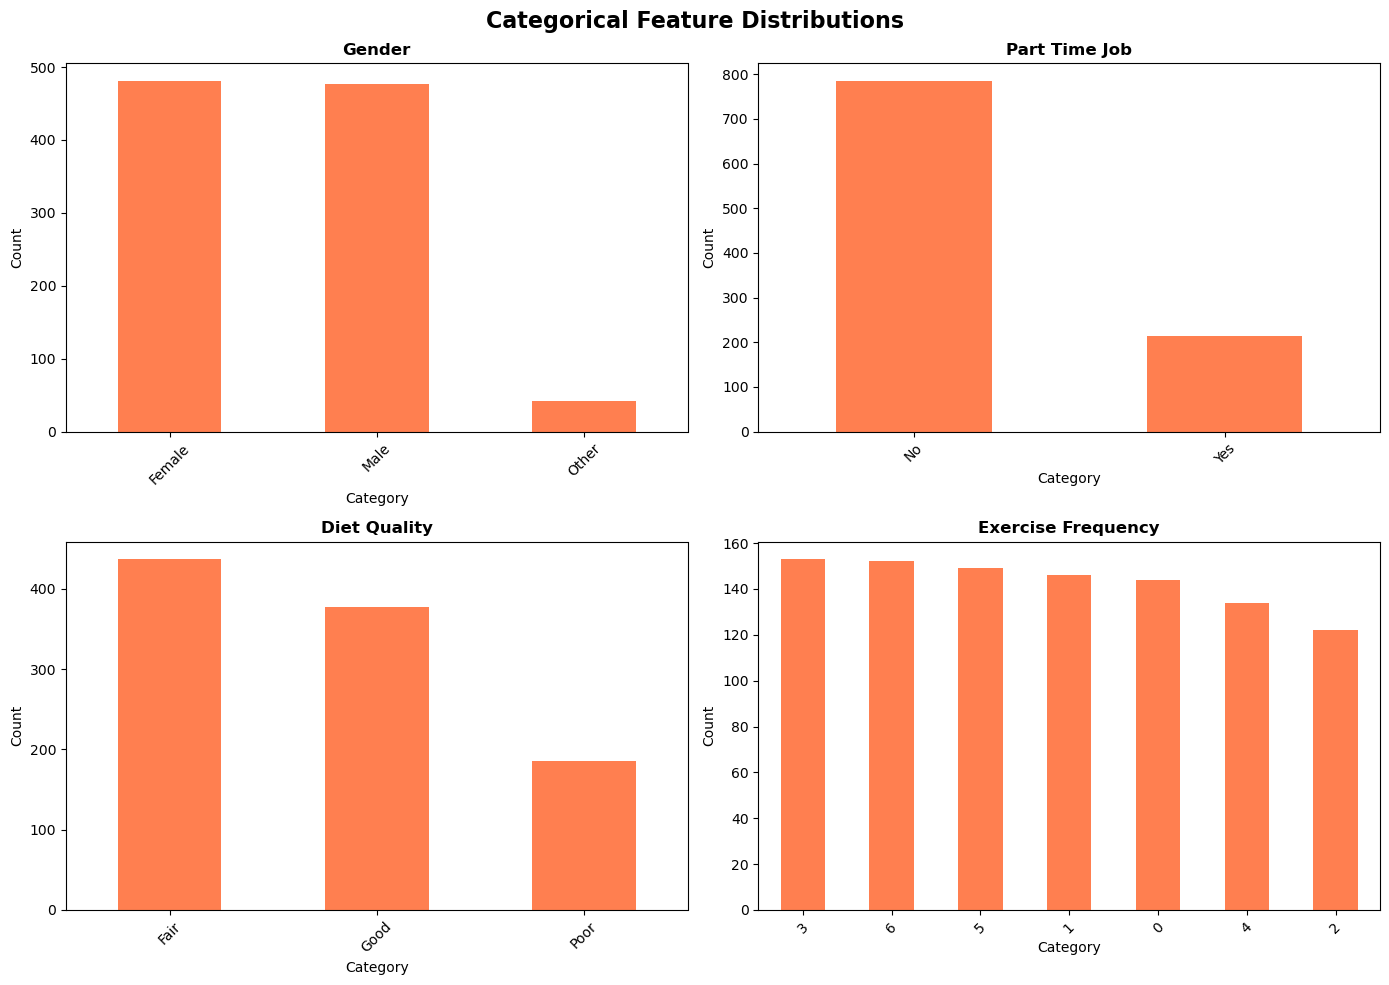

Categorical distributions saved as 'categorical_distributions.png'



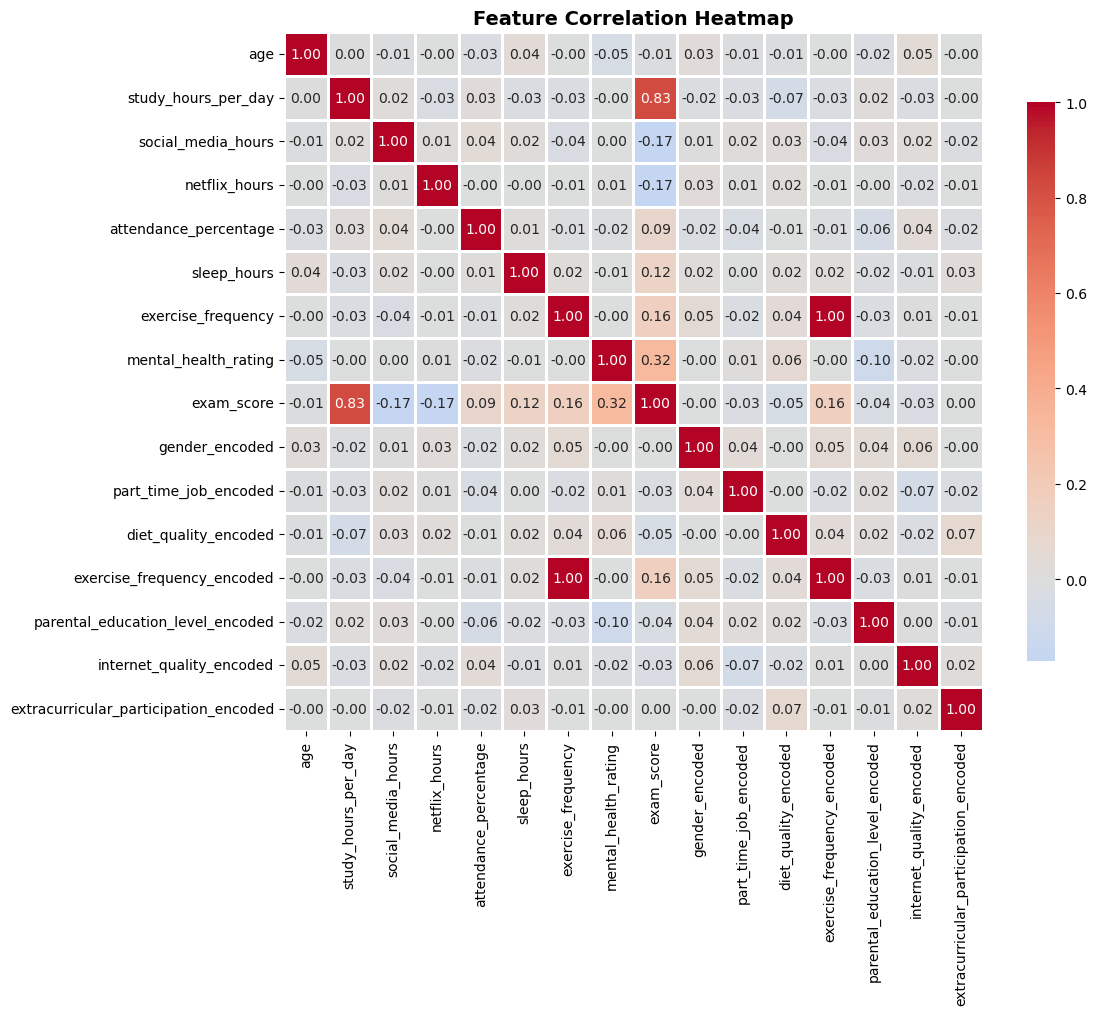

Correlation heatmap saved as 'correlation_heatmap.png'



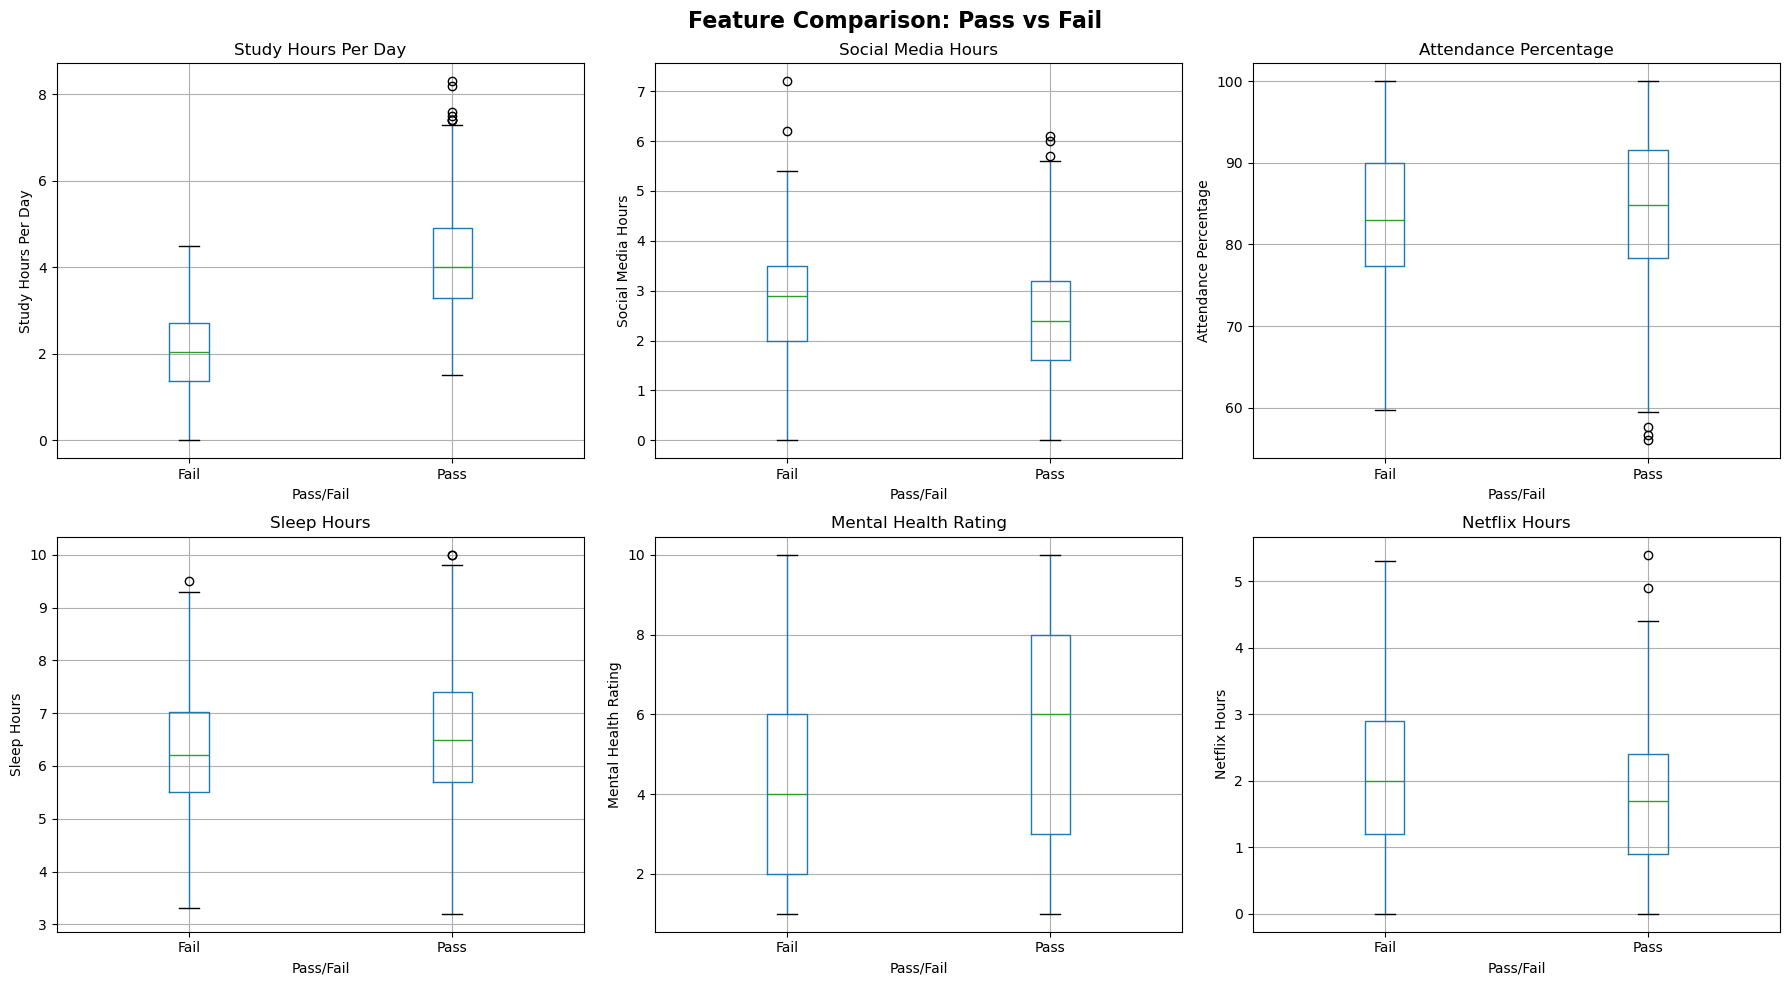

Pass/Fail comparison saved as 'pass_fail_comparison.png'



In [15]:
print("EXPLORATORY DATA ANALYSIS")
print("=" * 70)

# Visualize target distribution
plt.figure(figsize=(8, 6))
df_processed['pass_fail'].value_counts().plot(kind='bar', color=['#ff6b6b', '#4ecdc4'])
plt.title('Distribution of Pass/Fail', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Target distribution plot saved as 'target_distribution.png'\n")

# Visualize numeric feature distributions
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('Numeric Feature Distributions', fontsize=16, fontweight='bold')

numeric_features_plot = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
                         'attendance_percentage', 'sleep_hours', 'mental_health_rating', 'exam_score']

for idx, feature in enumerate(numeric_features_plot):
    row = idx // 3
    col = idx % 3
    if feature in df_processed.columns:
        axes[row, col].hist(df_processed[feature], bins=20, color='steelblue', edgecolor='black')
        axes[row, col].set_title(feature.replace('_', ' ').title(), fontweight='bold')
        axes[row, col].set_xlabel('Value')
        axes[row, col].set_ylabel('Frequency')

# Remove empty subplot
if len(numeric_features_plot) < 9:
    fig.delaxes(axes[2, 2])

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Feature distributions saved as 'feature_distributions.png'\n")

# Visualize categorical features
categorical_to_plot = ['gender', 'part_time_job', 'diet_quality', 'exercise_frequency']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Categorical Feature Distributions', fontsize=16, fontweight='bold')

for idx, feature in enumerate(categorical_to_plot):
    row = idx // 2
    col = idx % 2
    if feature in df_processed.columns:
        df_processed[feature].value_counts().plot(kind='bar', ax=axes[row, col], color='coral')
        axes[row, col].set_title(feature.replace('_', ' ').title(), fontweight='bold')
        axes[row, col].set_xlabel('Category')
        axes[row, col].set_ylabel('Count')
        axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Categorical distributions saved as 'categorical_distributions.png'\n")

# Correlation heatmap (numeric features only)
plt.figure(figsize=(12, 10))
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
correlation_matrix = df_processed[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Correlation heatmap saved as 'correlation_heatmap.png'\n")

# Compare features by Pass/Fail
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Feature Comparison: Pass vs Fail', fontsize=16, fontweight='bold')

features_to_compare = ['study_hours_per_day', 'social_media_hours', 'attendance_percentage', 
                       'sleep_hours', 'mental_health_rating', 'netflix_hours']

for idx, feature in enumerate(features_to_compare):
    row = idx // 3
    col = idx % 3
    if feature in df_processed.columns:
        df_processed.boxplot(column=feature, by='pass_fail', ax=axes[row, col])
        axes[row, col].set_title(feature.replace('_', ' ').title())
        axes[row, col].set_xlabel('Pass/Fail')
        axes[row, col].set_ylabel(feature.replace('_', ' ').title())

plt.suptitle('Feature Comparison: Pass vs Fail', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('pass_fail_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Pass/Fail comparison saved as 'pass_fail_comparison.png'\n")

# Part 5: Prepare Features and Target

Separate the features (independent variables) from the target (dependent variable).

In [16]:
print("PREPARING FEATURES AND TARGET")
print("=" * 70)

# Select features for the model
# Use encoded versions of categorical variables
feature_columns = []

# Add numeric features
for col in numeric_features:
    if col in df_processed.columns:
        feature_columns.append(col)

# Add encoded categorical features
for col in categorical_features:
    encoded_col = col + '_encoded'
    if encoded_col in df_processed.columns:
        feature_columns.append(encoded_col)

X = df_processed[feature_columns]
y = df_processed['pass_fail']

print("Features (X) - First 5 rows:")
print(X.head())
print("\nTarget (y) - First 5 values:")
print(y.head())
print("\n")

print(f"Total features used for prediction: {len(feature_columns)}")
print(f"Feature names: {feature_columns}")
print("\n")

# Display feature summary
print("Feature Summary:")
print("-" * 50)
print(f"Numeric features: {len(numeric_features)}")
print(f"Categorical features (encoded): {len(categorical_features)}")
print(f"Total features: {len(feature_columns)}")
print("\n")

PREPARING FEATURES AND TARGET
Features (X) - First 5 rows:
   age  study_hours_per_day  social_media_hours  netflix_hours  \
0   23                  0.0                 1.2            1.1   
1   20                  6.9                 2.8            2.3   
2   21                  1.4                 3.1            1.3   
3   23                  1.0                 3.9            1.0   
4   19                  5.0                 4.4            0.5   

   attendance_percentage  sleep_hours  mental_health_rating  gender_encoded  \
0                   85.0          8.0                     8               0   
1                   97.3          4.6                     8               0   
2                   94.8          8.0                     1               1   
3                   71.0          9.2                     1               0   
4                   90.9          4.9                     1               0   

   part_time_job_encoded  diet_quality_encoded  exercise_frequency_en

# Part 6: Split Data into Training and Testing Sets

Divide the data to train the model and evaluate its performance on unseen data.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Data Split Summary:")
print("=" * 50)
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print(f"Train-Test ratio: 75")
print("\n")

print("Training set class distribution:")
print(y_train.value_counts())
print("\nTesting set class distribution:")
print(y_test.value_counts())
print("\n")

Data Split Summary:
Training set size: 700 samples
Testing set size: 300 samples
Train-Test ratio: 75


Training set class distribution:
pass_fail
Pass    503
Fail    197
Name: count, dtype: int64

Testing set class distribution:
pass_fail
Pass    217
Fail     83
Name: count, dtype: int64




# Part 7: Create and Train Decision Tree Classifier

Initialize the Decision Tree model with specific parameters and train it on the training data.

In [18]:
# Create Decision Tree Classifier with specified parameters
clf = DecisionTreeClassifier(
    criterion='gini',      # Split criterion: 'gini' or 'entropy'
    max_depth=10,          # Maximum depth of the tree (increased for complex dataset)
    min_samples_split=10,  # Minimum samples to split a node
    min_samples_leaf=5,    # Minimum samples in leaf node
    random_state=42        # For reproducibility
)

# Train the model
clf.fit(X_train, y_train)

print("Decision Tree Model trained successfully!")
print("=" * 50)
print(f"Criterion: {clf.criterion}")
print(f"Max Depth: {clf.max_depth}")
print(f"Min Samples Split: {clf.min_samples_split}")
print(f"Min Samples Leaf: {clf.min_samples_leaf}")
print(f"Number of leaves: {clf.get_n_leaves()}")
print(f"Actual tree depth: {clf.get_depth()}")
print("\n")

Decision Tree Model trained successfully!
Criterion: gini
Max Depth: 10
Min Samples Split: 10
Min Samples Leaf: 5
Number of leaves: 41
Actual tree depth: 10




# Part 8: Make Predictions

Use the trained model to make predictions on the test set.

In [33]:
y_pred = clf.predict(X_test)
prob = clf.predict_proba(X_test)
confidence = np.max(prob, axis=1)
avg_confidence = confidence.mean()
print(f"Average confidence: {avg_confidence}")
print("Predictions on Test Set (first 15):")
print("=" * 50)
comparison = pd.DataFrame({
    'Actual': y_test.values[:15],
    'Predicted': y_pred[:15],
    'Match': ['✓' if a == p else '✗' for a, p in zip(y_test.values[:15], y_pred[:15])]
})
print(comparison)
print("\n")

Average confidence: 0.9535
Predictions on Test Set (first 15):
   Actual Predicted Match
0    Pass      Pass     ✓
1    Pass      Pass     ✓
2    Pass      Pass     ✓
3    Pass      Pass     ✓
4    Fail      Fail     ✓
5    Fail      Fail     ✓
6    Pass      Pass     ✓
7    Pass      Pass     ✓
8    Fail      Fail     ✓
9    Pass      Pass     ✓
10   Fail      Fail     ✓
11   Pass      Pass     ✓
12   Fail      Fail     ✓
13   Pass      Pass     ✓
14   Fail      Fail     ✓




# Part 9: Evaluate Model Performance

Calculate various metrics to assess how well the model performs.

In [20]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)

print("MODEL PERFORMANCE METRICS")
print("=" * 70)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\n")

# Extract confusion matrix values
tn, fp, fn, tp = cm.ravel()
print("Confusion Matrix Breakdown:")
print(f"True Negatives (Correctly predicted Fail): {tn}")
print(f"False Positives (Predicted Pass, Actually Fail): {fp}")
print(f"False Negatives (Predicted Fail, Actually Pass): {fn}")
print(f"True Positives (Correctly predicted Pass): {tp}")
print("\n")

# Classification Report
print("Classification Report:")
print("=" * 70)
print(classification_report(y_test, y_pred))
print("\n")

# Additional metrics
precision = metrics.precision_score(y_test, y_pred, pos_label='Pass')
recall = metrics.recall_score(y_test, y_pred, pos_label='Pass')
f1 = metrics.f1_score(y_test, y_pred, pos_label='Pass')

print("Detailed Metrics for 'Pass' class:")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall: {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score: {f1:.4f} ({f1*100:.2f}%)")
print("\n")

MODEL PERFORMANCE METRICS
Accuracy: 0.8967 (89.67%)


Confusion Matrix:
[[ 68  15]
 [ 16 201]]


Confusion Matrix Breakdown:
True Negatives (Correctly predicted Fail): 68
False Positives (Predicted Pass, Actually Fail): 15
False Negatives (Predicted Fail, Actually Pass): 16
True Positives (Correctly predicted Pass): 201


Classification Report:
              precision    recall  f1-score   support

        Fail       0.81      0.82      0.81        83
        Pass       0.93      0.93      0.93       217

    accuracy                           0.90       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.90      0.90      0.90       300



Detailed Metrics for 'Pass' class:
Precision: 0.9306 (93.06%)
Recall: 0.9263 (92.63%)
F1-Score: 0.9284 (92.84%)




# Part 10: Visualize the Decision Tree

Create a visual representation of the trained decision tree.

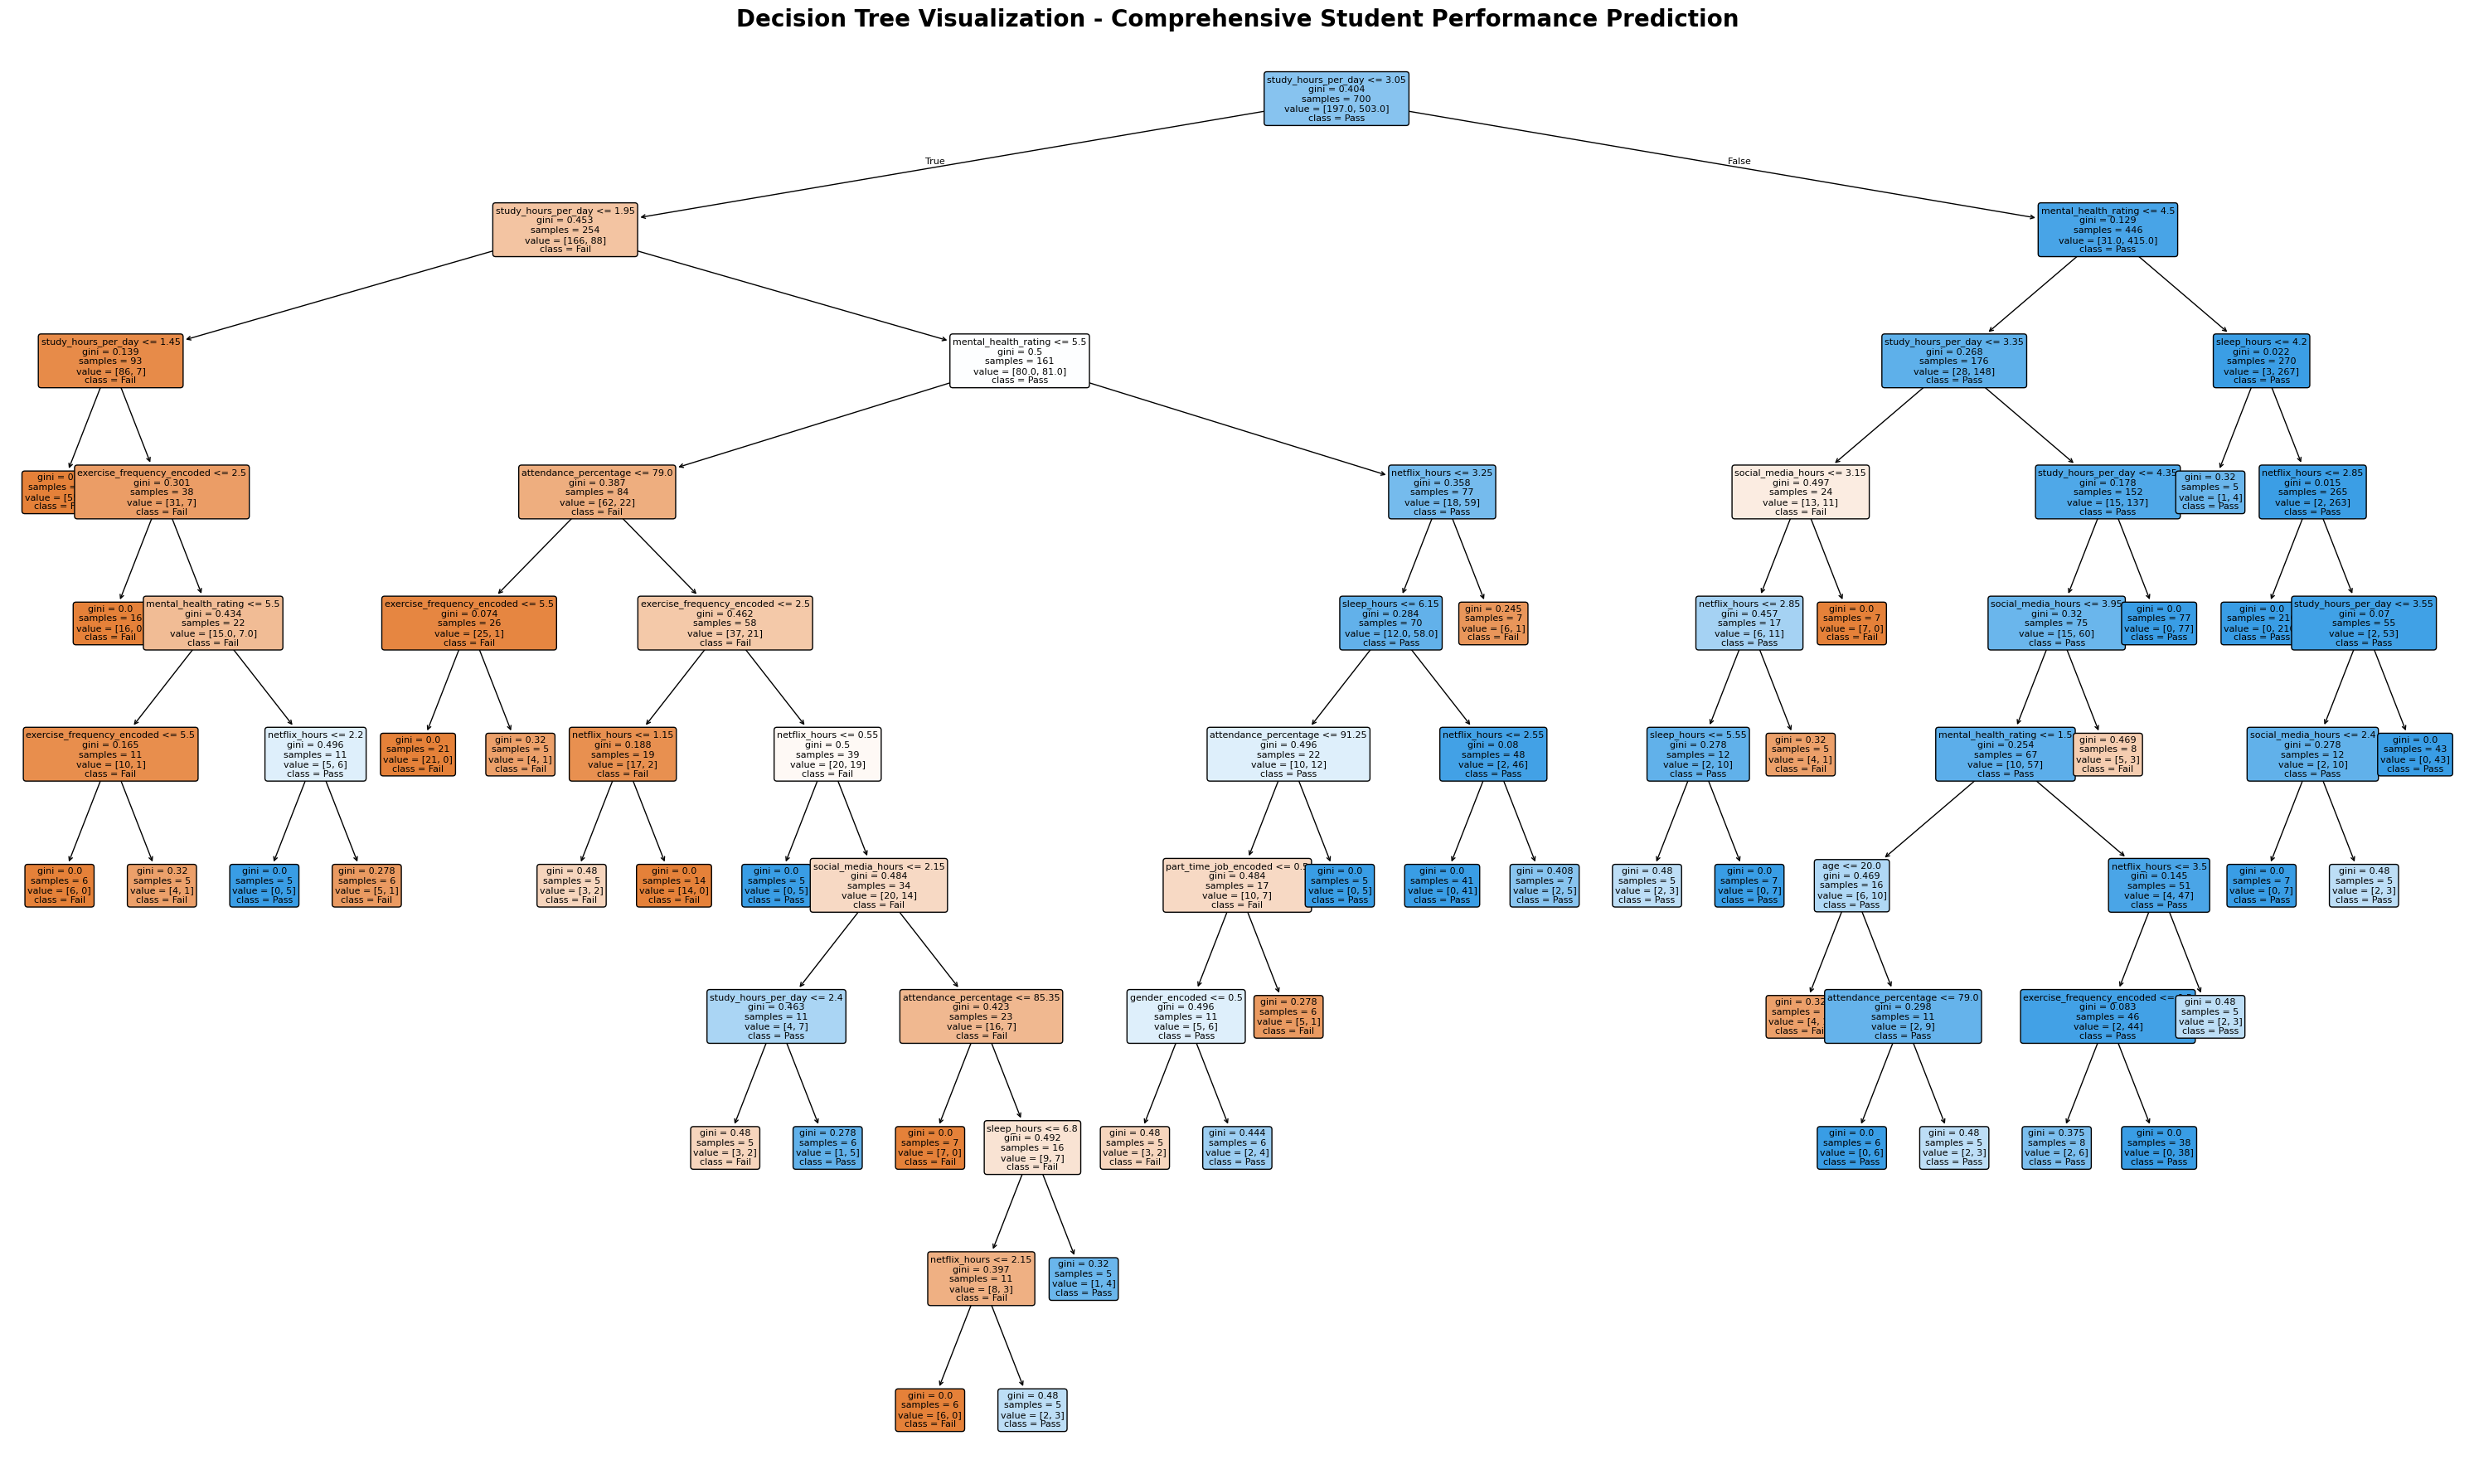

Decision tree diagram saved as 'decision_tree_diagram.png'



In [21]:
# Create a figure for the decision tree
plt.figure(figsize=(30, 18))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree Visualization - Comprehensive Student Performance Prediction", 
          fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig('decision_tree_diagram.png', dpi=300, bbox_inches='tight')
plt.show()

print("Decision tree diagram saved as 'decision_tree_diagram.png'\n")

# Part 11: Visualize Confusion Matrix

Create a heatmap of the confusion matrix for better visualization.

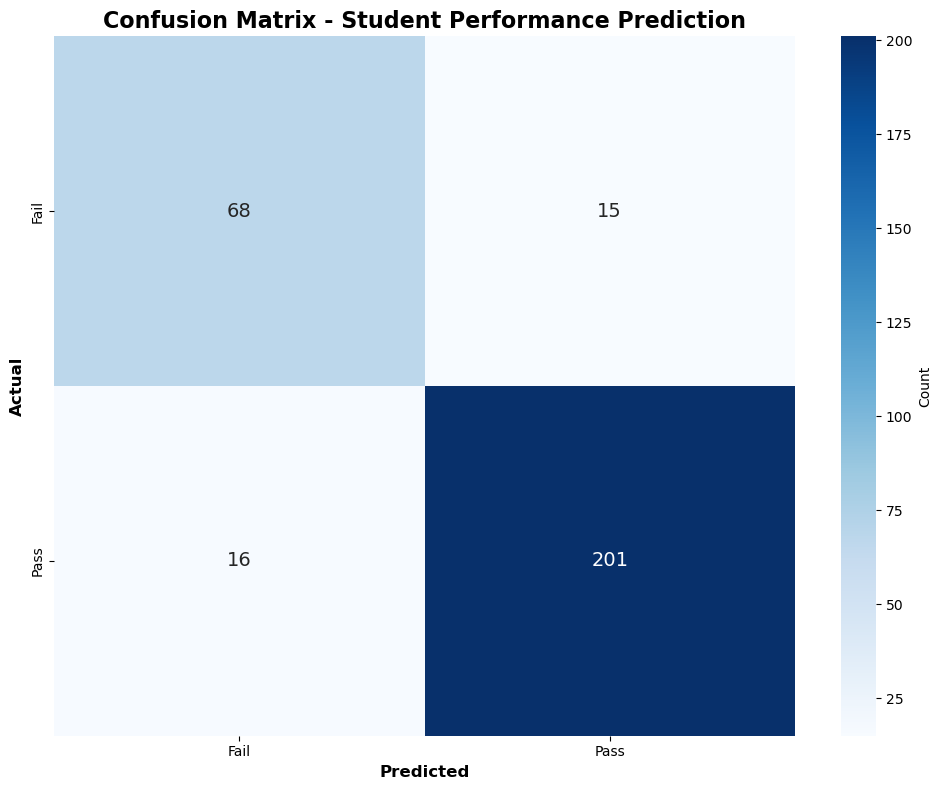

Confusion matrix visualization saved as 'confusion_matrix.png'



In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=clf.classes_, yticklabels=clf.classes_,
            cbar_kws={'label': 'Count'}, annot_kws={'size': 14})
plt.title('Confusion Matrix - Student Performance Prediction', 
          fontsize=16, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Confusion matrix visualization saved as 'confusion_matrix.png'\n")

# Part 12: Feature Importance Analysis

Analyze which features contribute most to the model's predictions.

FEATURE IMPORTANCE RANKING
                                  Feature  Importance
1                     study_hours_per_day    0.621378
6                    mental_health_rating    0.125432
3                           netflix_hours    0.089240
2                      social_media_hours    0.042328
4                   attendance_percentage    0.038970
5                             sleep_hours    0.035489
10             exercise_frequency_encoded    0.029618
0                                     age    0.011164
8                   part_time_job_encoded    0.004734
7                          gender_encoded    0.001648
9                    diet_quality_encoded    0.000000
11       parental_education_level_encoded    0.000000
12               internet_quality_encoded    0.000000
13  extracurricular_participation_encoded    0.000000




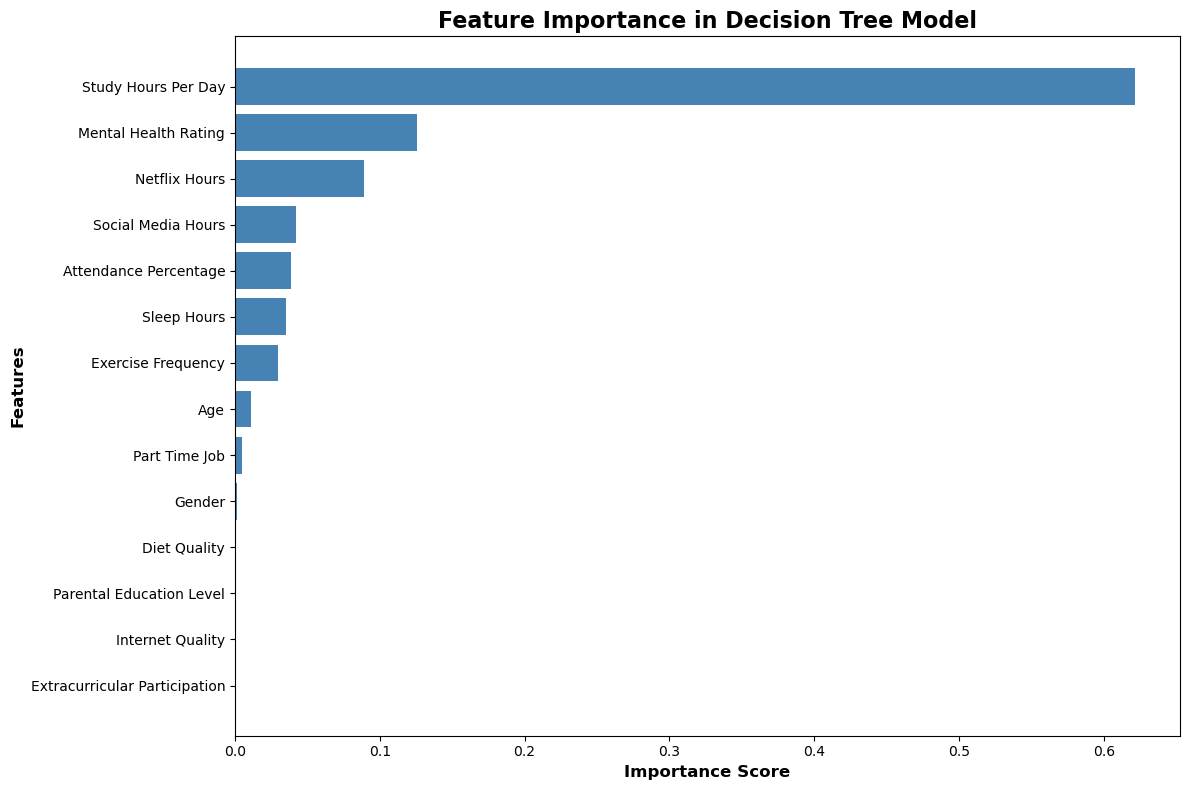

Feature importance visualization saved as 'feature_importance.png'

TOP 5 MOST IMPORTANT FEATURES:
Study Hours Per Day: 0.6214 (62.14%)
Mental Health Rating: 0.1254 (12.54%)
Netflix Hours: 0.0892 (8.92%)
Social Media Hours: 0.0423 (4.23%)
Attendance Percentage: 0.0390 (3.90%)




In [23]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values('Importance', ascending=False)

print("FEATURE IMPORTANCE RANKING")
print("=" * 70)
print(feature_importance)
print("\n")

# Clean feature names for visualization
feature_importance['Feature_Clean'] = feature_importance['Feature'].str.replace('_encoded', '').str.replace('_', ' ').str.title()

# Visualize feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importance)), feature_importance['Importance'], color='steelblue')
plt.yticks(range(len(feature_importance)), feature_importance['Feature_Clean'])
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Importance in Decision Tree Model', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Feature importance visualization saved as 'feature_importance.png'\n")

# Display top 5 most important features
print("TOP 5 MOST IMPORTANT FEATURES:")
print("=" * 70)
for idx, row in feature_importance.head(5).iterrows():
    print(f"{row['Feature_Clean']}: {row['Importance']:.4f} ({row['Importance']*100:.2f}%)")
print("\n")

# Part 13: Make Predictions on New Data

Test the model with completely new student data points.

In [24]:
# Example: Predict for new students
new_students = pd.DataFrame({
    'age': [20, 22, 19, 21, 18, 25],
    'study_hours_per_day': [6, 3, 8, 4, 2, 3],
    'social_media_hours': [2, 5, 1, 4, 6, 1],
    'netflix_hours': [1, 3, 0.5, 2, 4, 2],
    'attendance_percentage': [90, 65, 95, 75, 55, 90],
    'sleep_hours': [7, 5, 8, 6, 5, 3],
    'mental_health_rating': [8, 5, 9, 6, 4, 9],
    'gender_encoded': [1, 0, 1, 0, 1, 1],  # 0=Female, 1=Male
    'part_time_job_encoded': [0, 1, 0, 1, 1, 1],  # 0=No, 1=Yes
    'diet_quality_encoded': [2, 1, 2, 1, 0, 0],  # 0=Poor, 1=Fair, 2=Good
    'exercise_frequency_encoded': [2, 1, 3, 1, 0, 1], 
    'parental_education_level_encoded': [2, 1, 3, 2, 1, 2],
    'internet_quality_encoded': [2, 1, 2, 1, 0, 0],
    'extracurricular_participation_encoded': [1, 0, 1, 0, 0, 1]
})

# Ensure column order matches training data
new_students = new_students[X.columns]

new_predictions = clf.predict(new_students)
new_probabilities = clf.predict_proba(new_students)

print("PREDICTIONS ON NEW STUDENTS")
print("=" * 70)
results = pd.DataFrame({
    'Student': [f'Student {i+1}' for i in range(len(new_students))],
    'Study Hours': new_students['study_hours_per_day'].values,
    'Attendance %': new_students['attendance_percentage'].values,
    'Sleep Hours': new_students['sleep_hours'].values,
    'Predicted Result': new_predictions,
    'Confidence (%)': [max(prob)*100 for prob in new_probabilities]
})
print(results)
print("\n")

PREDICTIONS ON NEW STUDENTS
     Student  Study Hours  Attendance %  Sleep Hours Predicted Result  \
0  Student 1            6            90            7             Pass   
1  Student 2            3            65            5             Fail   
2  Student 3            8            95            8             Pass   
3  Student 4            4            75            6             Pass   
4  Student 5            2            55            5             Fail   
5  Student 6            3            90            3             Fail   

   Confidence (%)  
0      100.000000  
1      100.000000  
2      100.000000  
3      100.000000  
4      100.000000  
5       83.333333  




# Conclusion and Summary

In [25]:
print("=" * 70)
print("LABORATORY ACTIVITY COMPLETED SUCCESSFULLY!")
print("=" * 70)
print("\nGenerated files:")
print("1. target_distribution.png - Pass/Fail distribution")
print("2. feature_distributions.png - Numeric feature distributions")
print("3. categorical_distributions.png - Categorical feature distributions")
print("4. correlation_heatmap.png - Feature correlation analysis")
print("5. pass_fail_comparison.png - Feature comparison by outcome")
print("6. decision_tree_diagram.png - Visual representation of the tree")
print("7. confusion_matrix.png - Model performance visualization")
print("8. feature_importance.png - Feature contribution analysis")
print("\nKey Findings:")
print(f"- Model Accuracy: {accuracy*100:.2f}%")
print(f"- Most important feature: {feature_importance.iloc[0]['Feature_Clean']}")
print(f"- Second most important: {feature_importance.iloc[1]['Feature_Clean']}")
print(f"- Third most important: {feature_importance.iloc[2]['Feature_Clean']}")
print(f"- Tree depth: {clf.get_depth()}")
print(f"- Number of leaf nodes: {clf.get_n_leaves()}")
print(f"- Total features used: {len(feature_columns)}")
print("=" * 70)

LABORATORY ACTIVITY COMPLETED SUCCESSFULLY!

Generated files:
1. target_distribution.png - Pass/Fail distribution
2. feature_distributions.png - Numeric feature distributions
3. categorical_distributions.png - Categorical feature distributions
4. correlation_heatmap.png - Feature correlation analysis
5. pass_fail_comparison.png - Feature comparison by outcome
6. decision_tree_diagram.png - Visual representation of the tree
7. confusion_matrix.png - Model performance visualization
8. feature_importance.png - Feature contribution analysis

Key Findings:
- Model Accuracy: 89.67%
- Most important feature: Study Hours Per Day
- Second most important: Mental Health Rating
- Third most important: Netflix Hours
- Tree depth: 10
- Number of leaf nodes: 41
- Total features used: 14
